In [2]:
%load_ext autoreload
%autoreload 2

import json
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()



In [3]:
with open("../results/alignment_tax_v0.17.json", "r") as f:
# with open("../results/alignment_tax_v0.16.json", "r") as f:
    results = json.load(f)

In [ ]:
results["only_code"][""]

In [109]:
results["meta"]

{'model_name': 'meta-llama/Llama-2-7b-chat-hf',
 'act_file_path': 'data/activations/acts_v0.7_Llama-2-7b-hf_1000.pt',
 'layer': 29,
 'batch_size': 2,
 'max_seq_length': 4096,
 'total_tokens_per_batch': 1000000,
 'injection_coefficients': [0, 1, 2, 5, 10, 20, 50, 100],
 'note': '',
 'mode': {}}

In [11]:
#TODO: really messy code, should work on changing the structuring of the results
accs = {}
modes = ("only_text", "only_code")
injection_coefficients = list(results["only_code"].keys())
metrics = ("top1_acc", "top10_acc", "skip50_top1_acc", "skip50_top10_acc")


for mode in modes:
    accs[mode] = {}
    for metric in metrics:
        accs[mode][metric] = [0]*len(injection_coefficients), [0]*len(injection_coefficients)
    
    for i, ic in enumerate(injection_coefficients):
        keys_batches = results[mode][ic].keys()
        for batch in keys_batches:
            for metric in metrics:
                accs[mode][metric][0][i] += results[mode][ic][batch][metric]
                accs[mode][metric][1][i] += 1

for mode in modes:
    # for metric in metrics:
    for metric in ["skip50_top10_acc"]:
        sum_scores, counts = accs[mode][metric]
        avg_scores = [sum_score / count for sum_score, count in zip(sum_scores, counts)]
        relative_scores = [avg_score / avg_scores[0]*100 for avg_score in avg_scores]
        accs[mode][metric] = relative_scores
        print(max(avg_scores))

0.08135058365758749
0.041818177339901466


In [5]:
avg_scores

[0.041818177339901466,
 0.028597679012345674,
 0.04095767386091126,
 0.003434668304668305,
 0.0011927551020408165,
 0.0005747314578005116,
 0.0,
 0.0]

In [115]:
accs

{'only_text': {'top1_acc': [100.0,
   69.10496587462669,
   26.552009064939554,
   45.931948865679445,
   11.789270160740175,
   0.0,
   0.0,
   0.0],
  'top10_acc': [100.0,
   75.76161078707538,
   56.826822492372955,
   110.90059362974465,
   103.53101871484698,
   80.75631167595647,
   0.0,
   0.0],
  'skip50_top1_acc': [100.0,
   59.99023702761005,
   34.117882051655755,
   26.392536386460048,
   0.1885571880268162,
   0.0,
   0.0,
   0.0],
  'skip50_top10_acc': [100.0,
   71.4232370998164,
   378.69756411097825,
   37.86535657650129,
   8.631781748549397,
   4.836774997435181,
   0.0,
   0.0]},
 'only_code': {'top1_acc': [100.0,
   89.03253567982988,
   43.12343305022217,
   27.063002311762318,
   5.0886354484408525,
   0.0,
   0.0,
   0.0],
  'top10_acc': [100.0,
   77.18102875862387,
   39.84229847273394,
   56.45975381015235,
   45.54441658209114,
   35.05970454627263,
   0.0,
   0.0],
  'skip50_top1_acc': [100.0,
   90.85363183107724,
   122.35421590114919,
   4.67401202201245

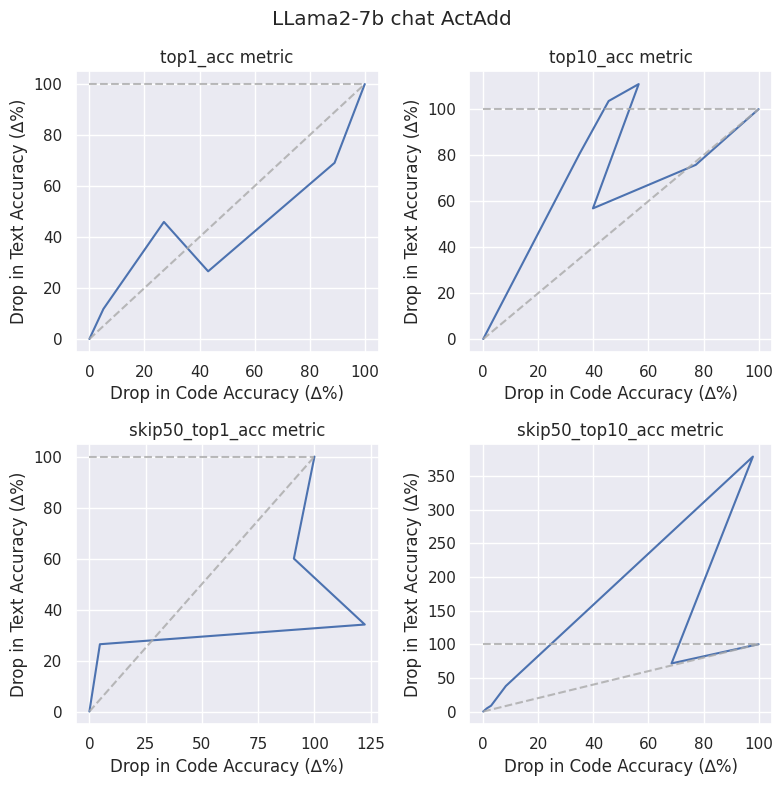

In [116]:
# create a seaborn style graph
sns.set_theme()

fig, axs = plt.subplots(2, 2, figsize=(8,8))
scale = 100

for metric, ax in zip(metrics, axs.reshape(-1)):
    ax.plot(accs["only_code"][metric], accs['only_text'][metric])
    ax.set_title(f"{metric} metric")
    ax.set_xlabel("Drop in Code Accuracy (∆%)")
    ax.set_ylabel("Drop in Text Accuracy (∆%)")

    ax.plot([0, scale], [scale, scale], color="darkgray", linestyle="--", alpha=0.8)
    ax.plot([0, scale], [0,     scale], color="darkgray", linestyle="--", alpha=0.8)

plt.suptitle("LLama2-7b chat ActAdd")
fig.tight_layout()
plt.show()

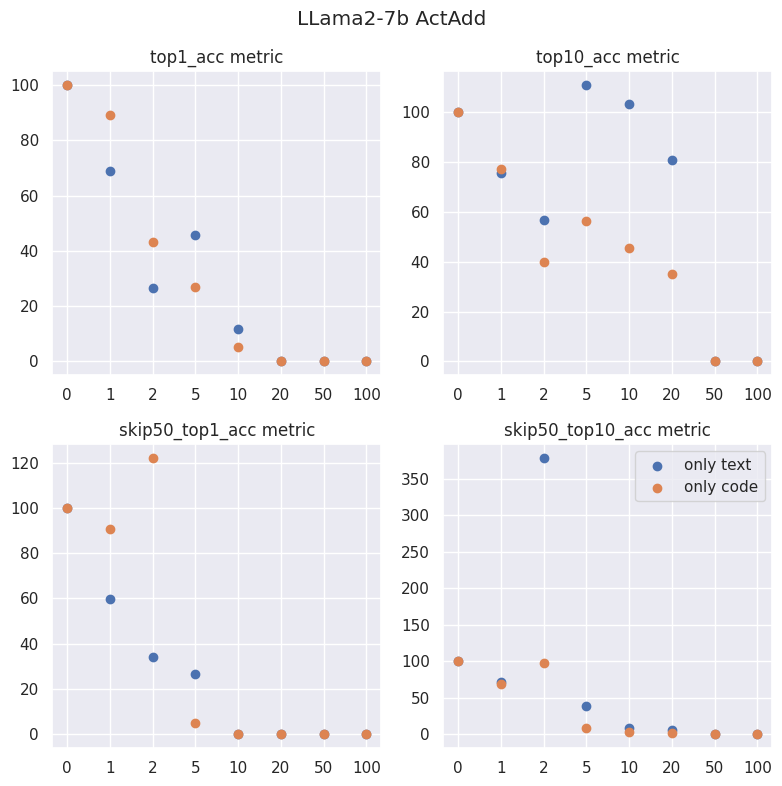

In [117]:
# create a seaborn style graph
sns.set_theme()
fig, axs = plt.subplots(2, 2, figsize=(8,8))
scale = 100
ic_ints = [ic.split("_")[2] for ic in injection_coefficients]

for metric, ax in zip(metrics, axs.reshape(-1)):
    # ax.scatter(accs["only_code"][metric], accs['only_text'][metric])
    ax.scatter(ic_ints, accs['only_text'][metric], label="only text")
    ax.scatter(ic_ints, accs['only_code'][metric], label="only code")

    ax.set_title(f"{metric} metric")
    # ax.set_xlabel("Drop in Code Accuracy (∆%)")
    # ax.set_ylabel("Drop in Text Accuracy (∆%)")

    # ax.plot([0, scale], [scale, scale], color="darkgray", linestyle="--", alpha=0.8)
    # ax.plot([0, scale], [0,     scale], color="darkgray", linestyle="--", alpha=0.8)
plt.legend()
plt.suptitle("LLama2-7b ActAdd")
fig.tight_layout()
plt.show()